# World Happiness Report Project


Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

In [244]:
df=pd.read_csv("world_happiness.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [245]:
df.set_index('Happiness Rank', inplace=True)

In [246]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [247]:
df.head(15)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [248]:
df.tail(15)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
144,Niger,Sub-Saharan Africa,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
145,Cambodia,Southeastern Asia,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
146,Tanzania,Sub-Saharan Africa,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
147,Madagascar,Sub-Saharan Africa,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
148,Central African Republic,Sub-Saharan Africa,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
149,Chad,Sub-Saharan Africa,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
150,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
151,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
152,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [249]:
df.shape

(158, 11)

In [250]:
print("Columns :",df.columns) 

Columns : Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [251]:
print("data types:", df.dtypes)

data types: Country                           object
Region                            object
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [252]:
print("info:", df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 14.8+ KB
info: None


In [253]:
# checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [254]:
df.isnull().sum().sum()

0

<Axes: ylabel='Happiness Rank'>

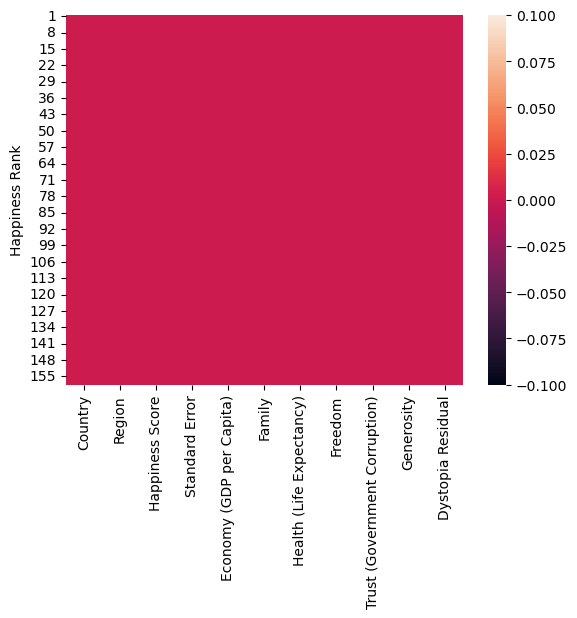

In [255]:
sns.heatmap(df.isnull()) #Lets visualize the null values using heatmap

In [256]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland                 1
Bangladesh                  1
Greece                      1
Lebanon                     1
Hungary                     1
Honduras                    1
Tajikistan                  1
Tunisia                     1
Palestinian Territories     1
Iran                        1
Mongolia                    1
Ukraine                     1
Iraq                        1
South Africa                1
Ghana                       1
Zimbabwe                    1
Liberia                     1
India                       1
Swaziland                   1
Laos                        1
Haiti                       1
Latvia                      1
Jordan                      1
Montenegro                  1
China                       1
Zambia                      1
Romania                     1
Serbia                      1
Portugal                    1
Philippines                 1
Dominican Republic          1
Somaliland region           1
Morocco                     1
Macedonia 

In [257]:
pd.set_option('display.max_rows',None) #allow to display all rows of a DataFrame without any truncation

In [258]:
df['Country']

Happiness Rank
1                   Switzerland
2                       Iceland
3                       Denmark
4                        Norway
5                        Canada
6                       Finland
7                   Netherlands
8                        Sweden
9                   New Zealand
10                    Australia
11                       Israel
12                   Costa Rica
13                      Austria
14                       Mexico
15                United States
16                       Brazil
17                   Luxembourg
18                      Ireland
19                      Belgium
20         United Arab Emirates
21               United Kingdom
22                         Oman
23                    Venezuela
24                    Singapore
25                       Panama
26                      Germany
27                        Chile
28                        Qatar
29                       France
30                    Argentina
31               Czech Re

In [259]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
Country,158
Region,10
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158


In [260]:
df.duplicated().sum()

0

In [261]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Country', 'Region']




In [262]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']




In [263]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Country']=imp.fit_transform(df['Country'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
df['Region']=imp.fit_transform(df['Region'].values.reshape(-1,1))


In [264]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [265]:
df.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [266]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [267]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,135.0,9.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,58.0,9.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,37.0,9.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,105.0,9.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,24.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,45.0,9.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,99.0,9.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,134.0,9.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,100.0,0.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [268]:
# describe the dataset- give the satistical summary of numerical columns
df.describe()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


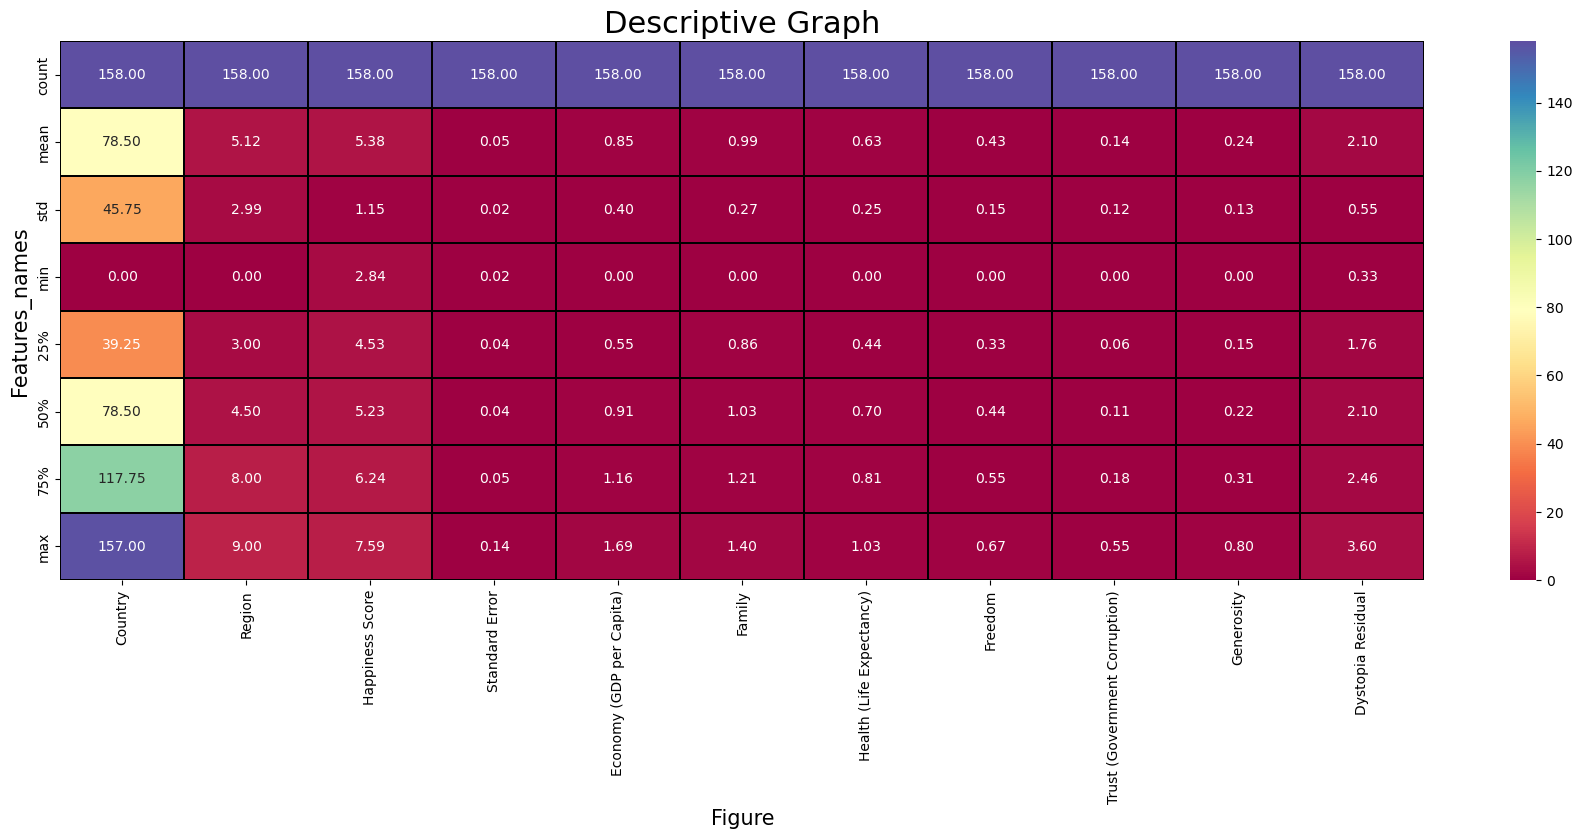

In [269]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

In [270]:
#dropping the country column
df.drop("Country",axis=1, inplace=True)

In [271]:
df.corr()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

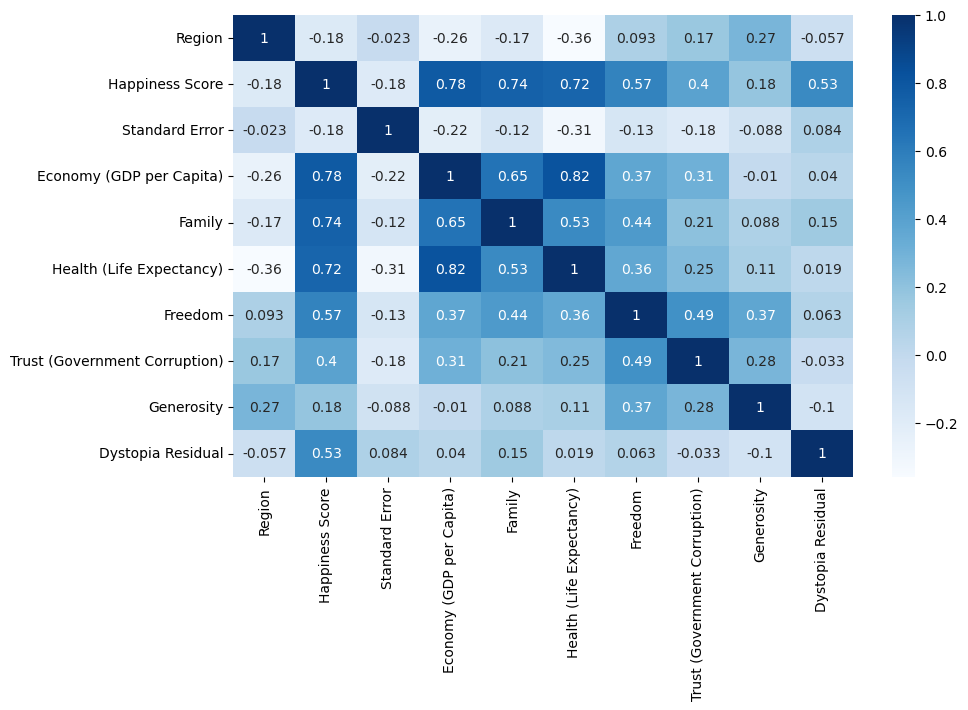

In [272]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

 observation: 1. Region and Standard Error w.r.t. Happinness Score have largest negative value is -0.18. we can drop the region , not standard Error because of valuable column w.r.t. happiness score

In [273]:
# dropping the -ively correlated values
df.drop("Region",axis=1, inplace=True)

In [274]:
corrmatrix=df.corr()
corrmatrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

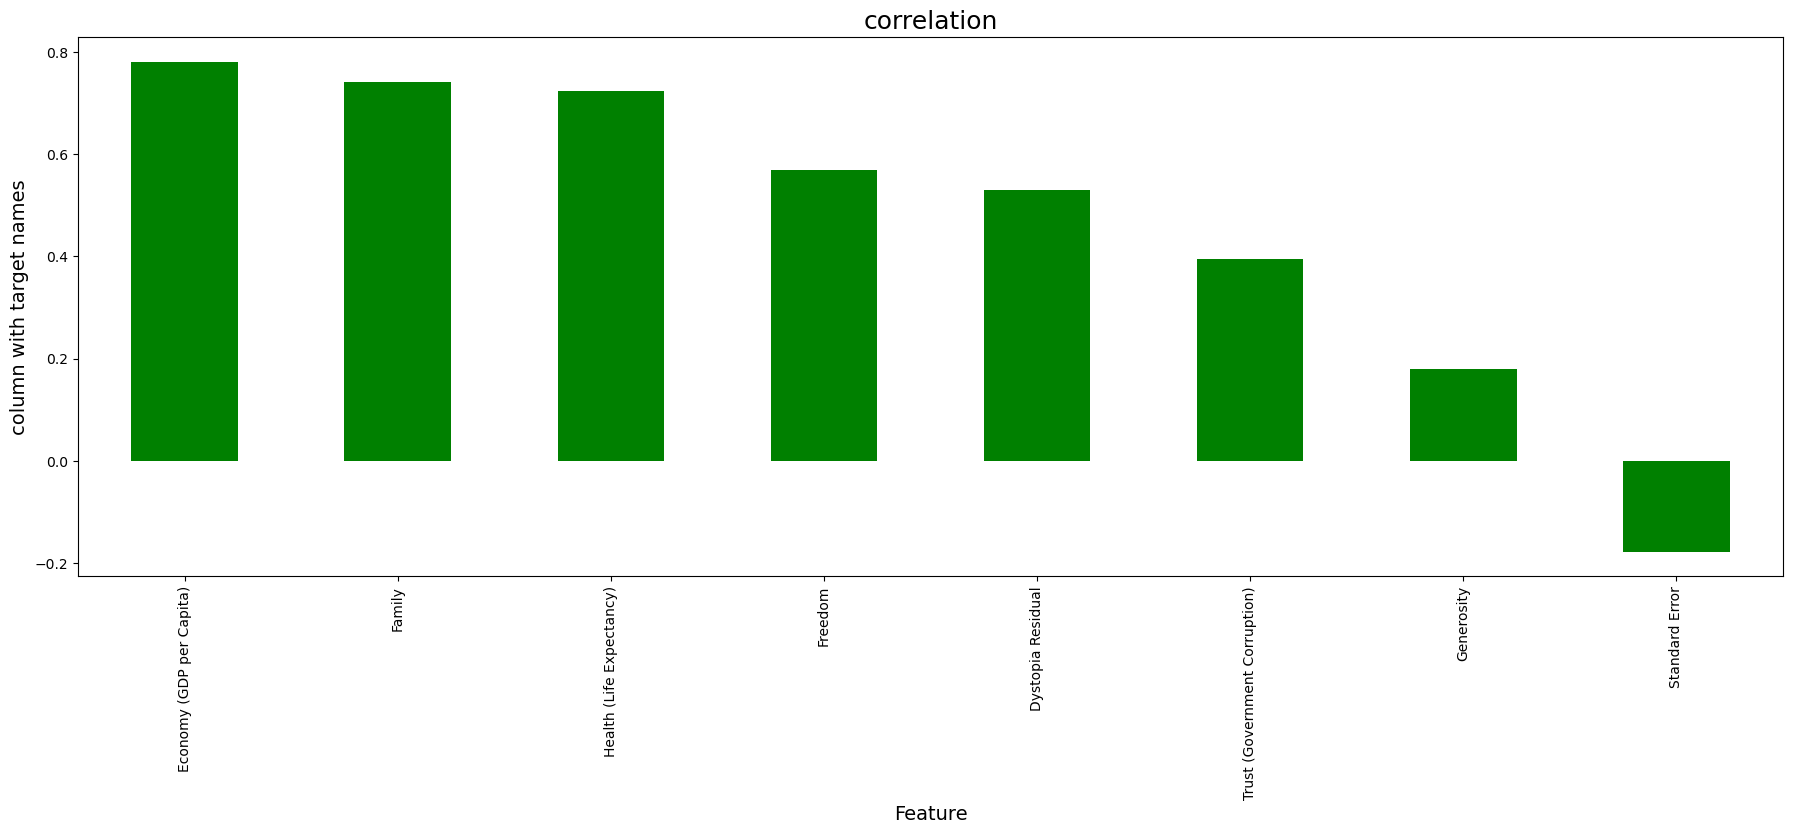

In [275]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [276]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [277]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Keeping -/+0.5 as the range for skewness,here are the columns (Standard Error,Family, Health (Life Expectancy), Trust (Government Corruption), Generosity ) which does not lie within this range. but only do for Standard Error and Trust (Government Corruption) because of largest value of skewness.

In [278]:

df["Standard Error"]=np.cbrt(df["Standard Error"])
df["Trust (Government Corruption)"]=np.cbrt(df["Trust (Government Corruption)"])



In [279]:
#Again checking the skewness
df.skew()

Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

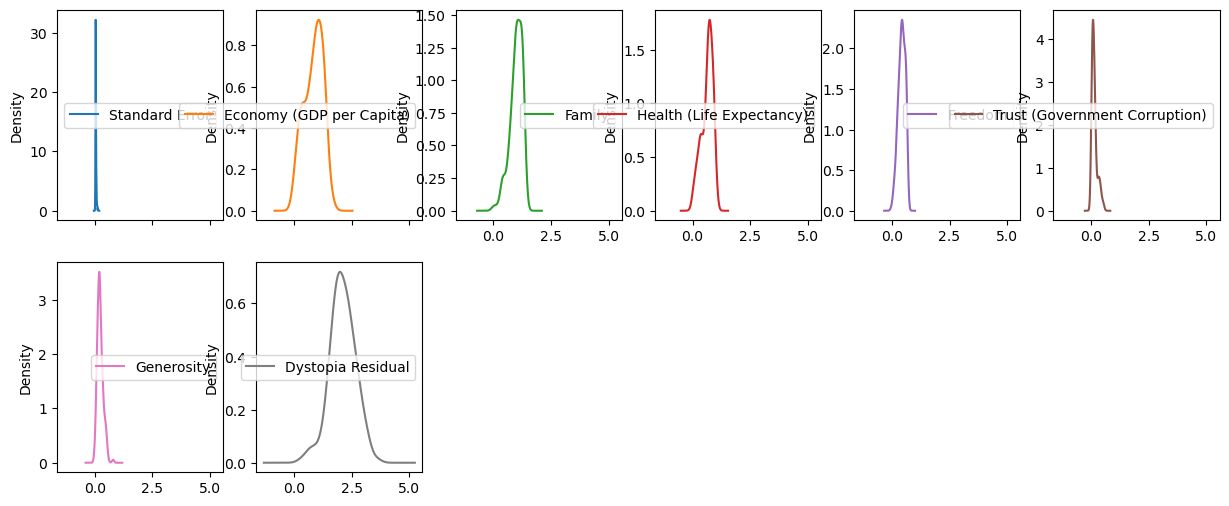

In [281]:
x.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

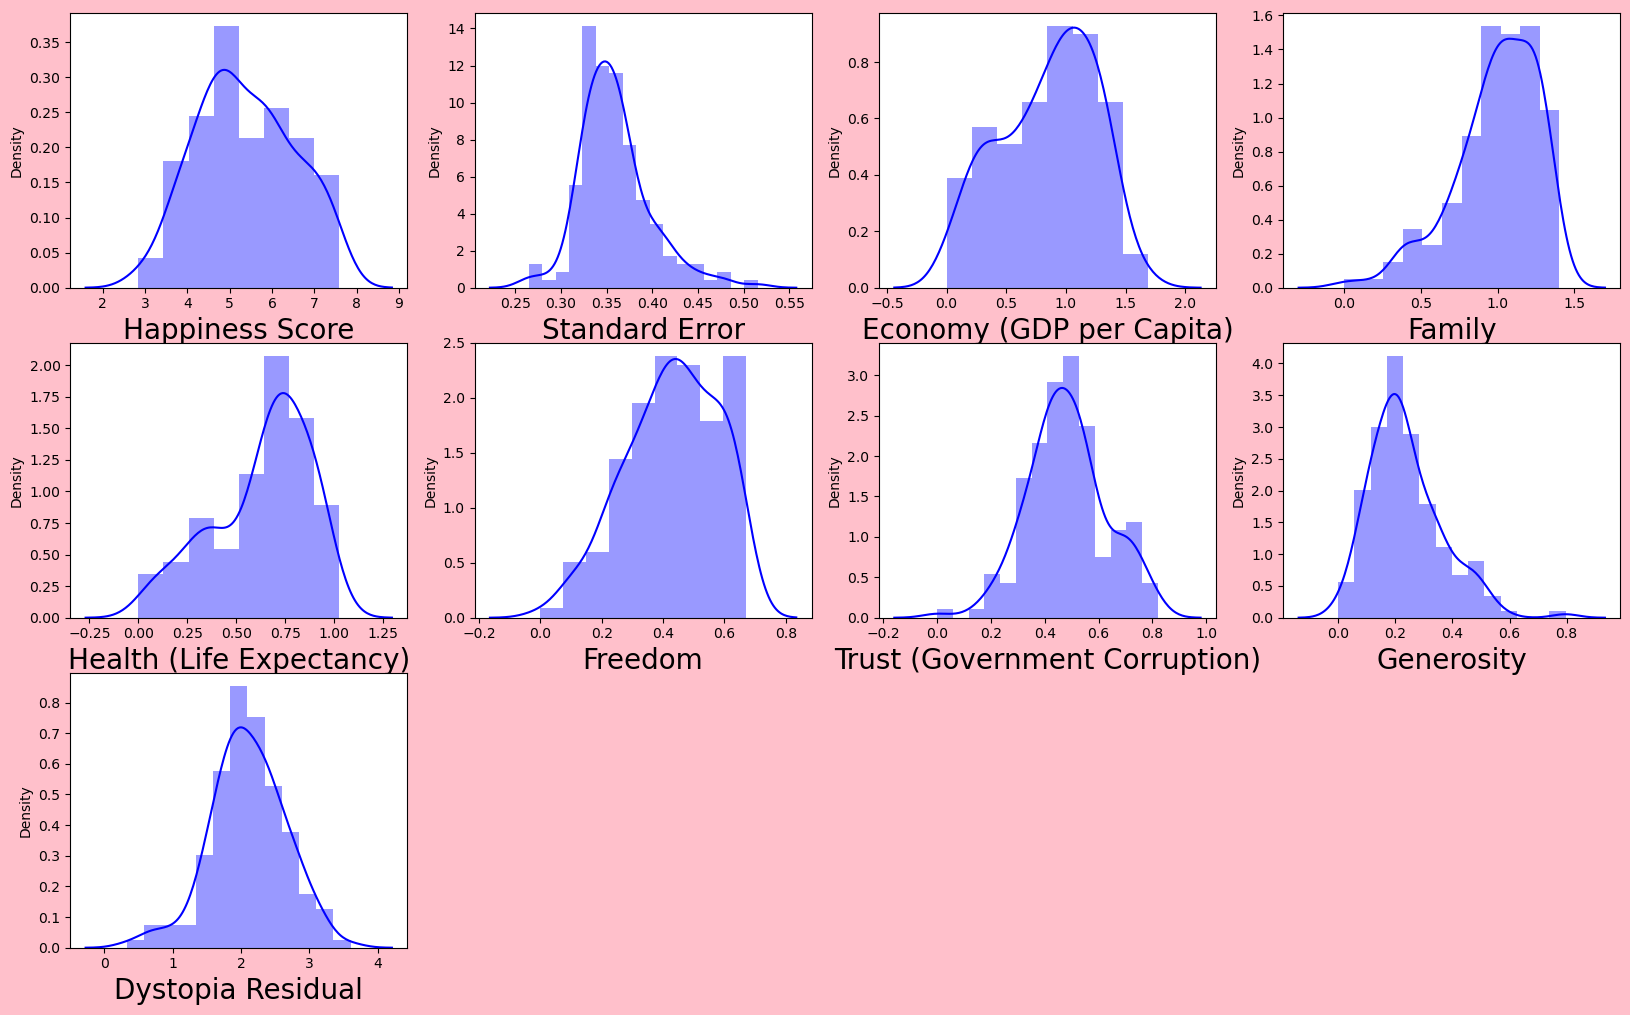

In [282]:
plt.figure(figsize=(20,25), facecolor="pink")
p=1
for column in df:
    if p<=18:
        ax=plt.subplot(6,4,p)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    p=p+1
plt.show()

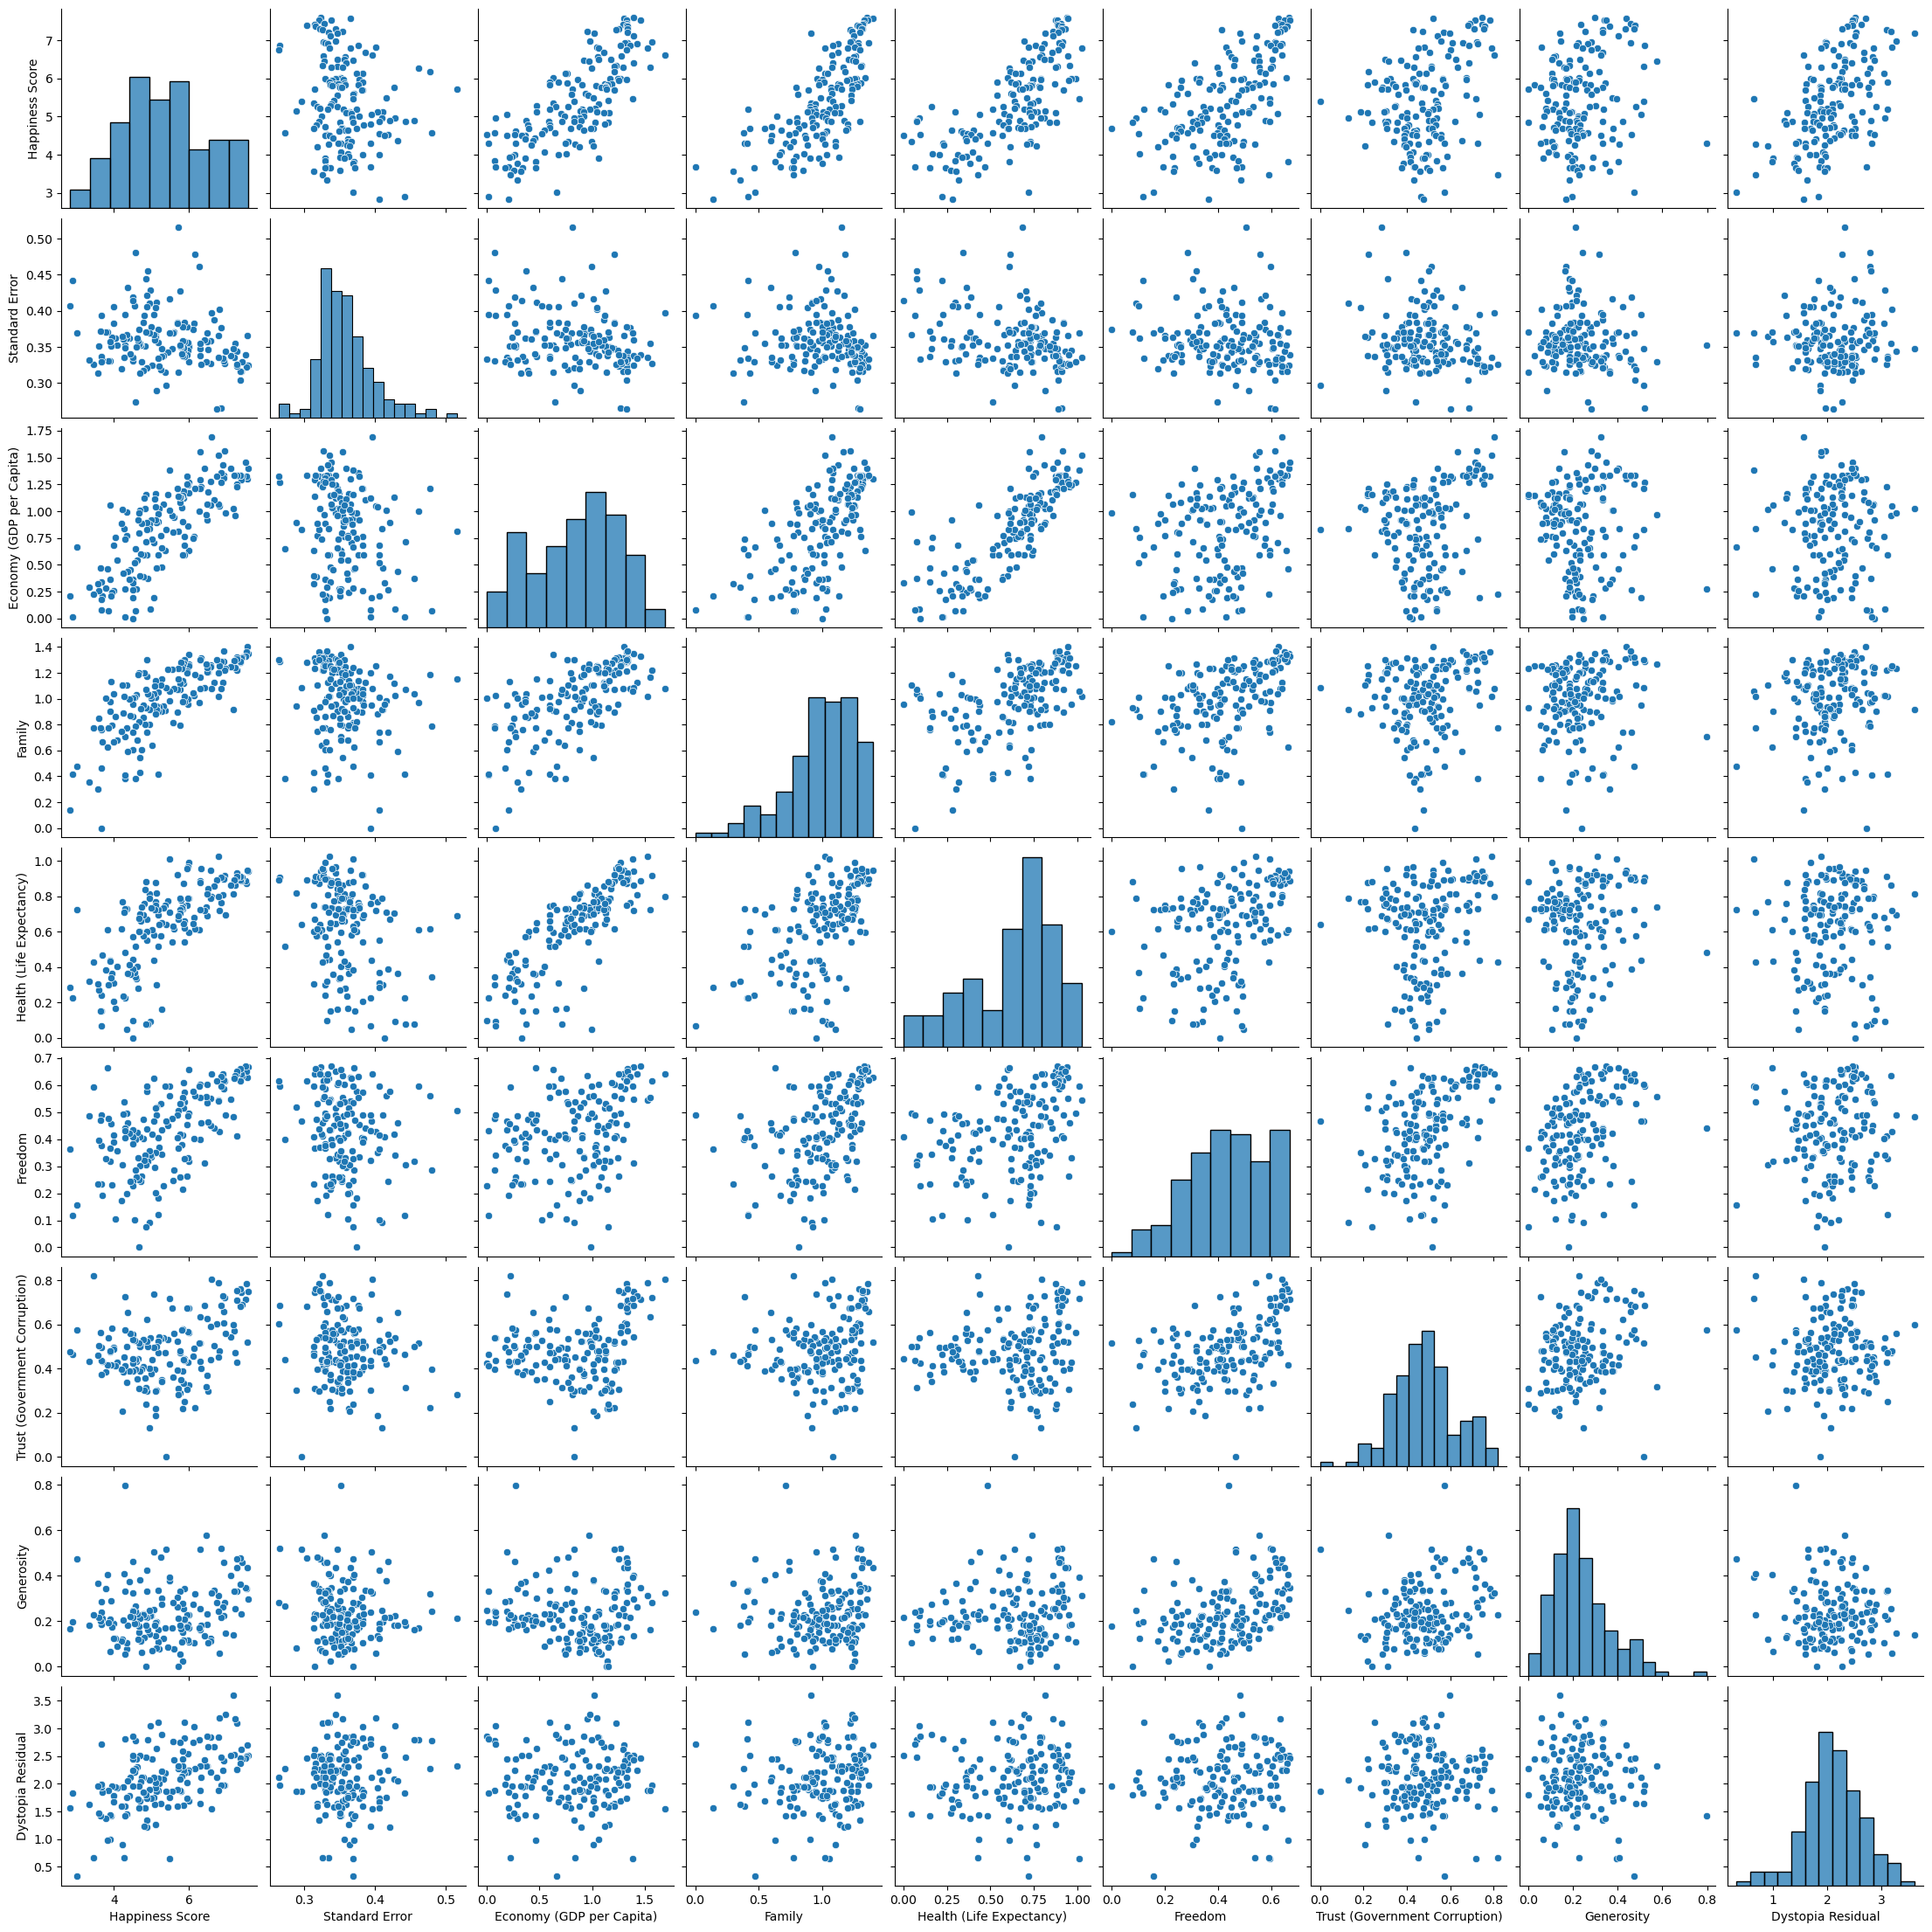

In [283]:
sns.pairplot(df)

Happiness Score                     Axes(0.125,0.53;0.110714x0.35)
Standard Error                   Axes(0.257857,0.53;0.110714x0.35)
Economy (GDP per Capita)         Axes(0.390714,0.53;0.110714x0.35)
Family                           Axes(0.523571,0.53;0.110714x0.35)
Health (Life Expectancy)         Axes(0.656429,0.53;0.110714x0.35)
Freedom                          Axes(0.789286,0.53;0.110714x0.35)
Trust (Government Corruption)       Axes(0.125,0.11;0.110714x0.35)
Generosity                       Axes(0.257857,0.11;0.110714x0.35)
Dystopia Residual                Axes(0.390714,0.11;0.110714x0.35)
dtype: object

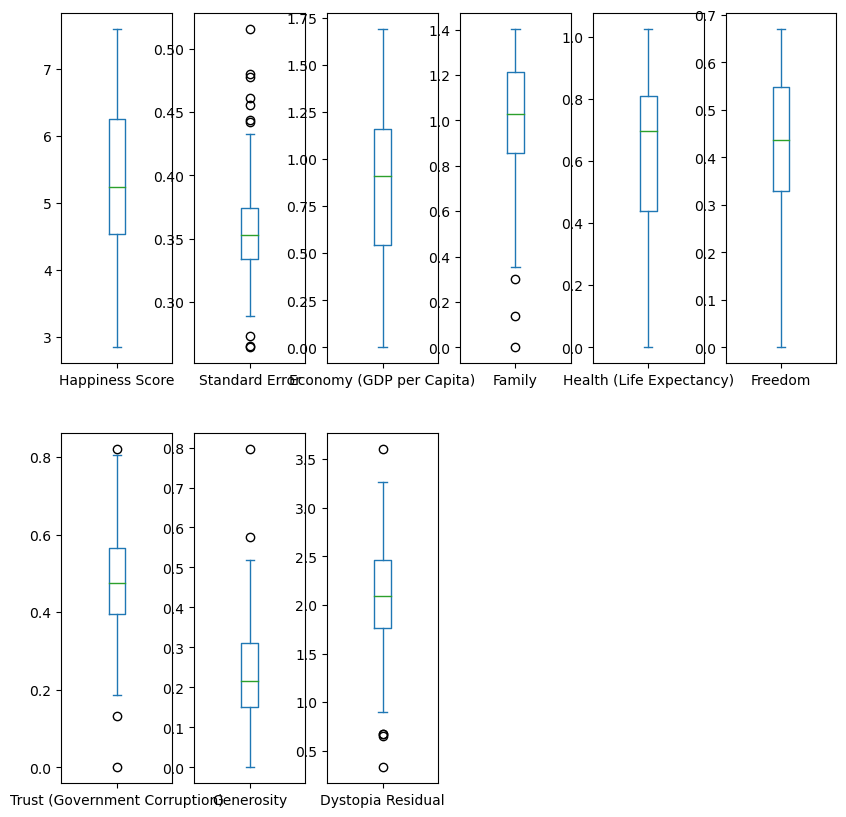

In [284]:
# checking the outliers by using boxplot
df.plot(kind='box',subplots=True, layout=(2,6), figsize=(10,10))

In [285]:
from scipy.stats import zscore

# removing the outliers
z=np.abs(zscore(df))
z




,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,1.937360,0.892612,1.369621,1.320281,1.263408,1.577438,1.826993,0.471040,0.758258
2,1.914581,0.172283,1.135226,1.514458,1.289434,1.332456,0.260958,1.575856,1.092857
3,1.884792,0.961125,1.192861,1.361054,0.992229,1.469659,2.075620,0.824293,0.712335
4,1.880411,0.524996,1.525130,1.251922,1.035145,1.605131,1.592625,0.868638,0.663893
5,1.797179,0.777930,1.194876,1.221204,1.118054,1.360416,1.428028,1.748563,0.639337
6,1.778780,1.120636,1.105190,1.205183,1.050980,1.418466,1.802095,0.029976,0.943417
7,1.754249,1.427038,1.202715,1.064891,1.066124,1.245847,1.372465,1.891021,0.664600
8,1.741983,1.105955,1.208364,1.097671,1.139329,1.539026,1.902187,0.992407,0.493323
9,1.673644,0.925490,1.005474,1.210376,1.129179,1.403088,1.865306,1.882389,0.299519


In [286]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([ 40,  64,  73, 115, 128, 147, 155, 157]), array([1, 1, 6, 1, 7, 3, 8, 3]))


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
6,7.406,0.315483,1.29025,1.31826,0.88911,0.64169,0.745136,0.23351,2.61955
7,7.378,0.303623,1.32944,1.28017,0.89284,0.61576,0.682663,0.47610,2.46570
8,7.364,0.316052,1.33171,1.28907,0.91087,0.65980,0.759691,0.36262,2.37119
9,7.286,0.323037,1.25018,1.31967,0.90837,0.63938,0.754328,0.47501,2.26425


In [287]:
df_new.shape

(150, 9)

In [288]:
# data loss percentage
print("Data Loss Percentage",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data Loss Percentage 5.063291139240507


Approx 5% data loss is acceptable.

Happiness Score                     Axes(0.125,0.53;0.110714x0.35)
Standard Error                   Axes(0.257857,0.53;0.110714x0.35)
Economy (GDP per Capita)         Axes(0.390714,0.53;0.110714x0.35)
Family                           Axes(0.523571,0.53;0.110714x0.35)
Health (Life Expectancy)         Axes(0.656429,0.53;0.110714x0.35)
Freedom                          Axes(0.789286,0.53;0.110714x0.35)
Trust (Government Corruption)       Axes(0.125,0.11;0.110714x0.35)
Generosity                       Axes(0.257857,0.11;0.110714x0.35)
Dystopia Residual                Axes(0.390714,0.11;0.110714x0.35)
dtype: object

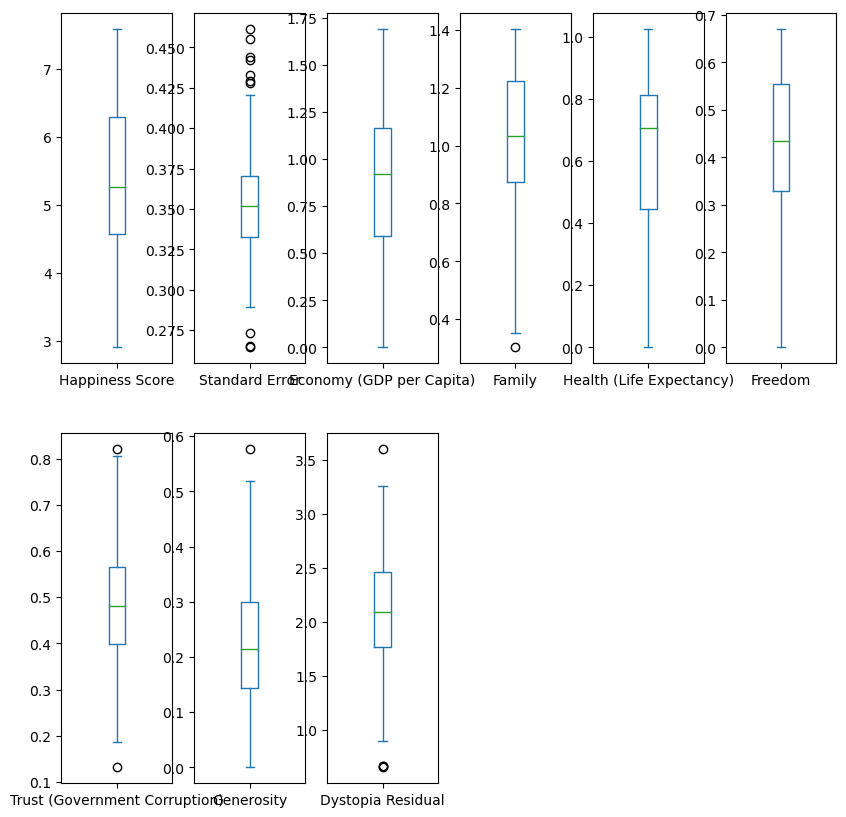

In [289]:
# again checking the outliers by using boxplot
df_new.plot(kind='box',subplots=True, layout=(2,6), figsize=(10,10))

In [290]:
x1=df_new.drop("Happiness Score",axis=1)
y1=df_new["Happiness Score"]

# Feature Scaling using Standard Scalarization

In [291]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.930644,1.349948,1.365028,1.236136,1.557793,1.845601,0.568737,0.760442
1,0.277392,1.111330,1.575136,1.262274,1.314741,0.227127,1.760558,1.104361
2,-1.008366,1.170003,1.409146,0.963784,1.450864,2.102554,0.949809,0.713239
3,-0.513613,1.508258,1.291059,1.006886,1.585269,1.603385,0.997646,0.663448
4,-0.800546,1.172055,1.257821,1.090153,1.342481,1.433276,1.946866,0.638208
5,-1.189319,1.080752,1.240485,1.022789,1.400074,1.819869,0.028266,0.950759
6,-1.536906,1.180035,1.088682,1.037999,1.228815,1.375853,2.100541,0.664175
7,-1.172664,1.185785,1.124152,1.111520,1.519684,1.923313,1.131162,0.488126
8,-0.967941,0.979240,1.246104,1.101326,1.384817,1.885197,2.091230,0.288923
9,-0.343522,1.190523,1.204497,1.195889,1.463148,1.562895,1.754749,0.293040


# Checking VIF (Variance Inflation Factor)

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,1.156797,Standard Error
1,3.992810,Economy (GDP per Capita)
2,1.924886,Family
3,3.418128,Health (Life Expectancy)
4,1.973389,Freedom
5,1.481362,Trust (Government Corruption)
6,1.324838,Generosity
7,1.029241,Dystopia Residual


we don't drop any column because there are not any column which has threshold value greater than vif.

# Finding the random state

In [310]:
#Finding best random state
maxr2=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2,'on Random_State',maxRS)       

Best accuracy is 0.9995142492446011 on Random_State 72


In [311]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.5, random_state=72)

In [312]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

In [313]:
print(f"Regression R2:-{lr.score(x_test,y_test)}")

Regression R2:-0.9987549070971503


In [314]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


print("error:")
print("Mean squared error:", mean_squared_error(y_test, predlr))
print("Mean absolute error:", mean_absolute_error(y_test, predlr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predlr)))

error:
Mean squared error: 0.0018851032708147519
Mean absolute error: 0.028726124879525906
Root Mean squared error: 0.04341777597729704


In [315]:
print(r2_score(y_test, predlr))

0.9987549070971503


In [316]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [317]:
svr.score(x_train,y_train)
predsvr=svr.predict(x_test)
print('error:')
print(mean_squared_error(y_test,predsvr))
print("Mean absolute error:", mean_absolute_error(y_test, predsvr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predsvr)))

error:
0.00819875943827487
Mean absolute error: 0.07363159953056336
Root Mean squared error: 0.09054700126605447


In [318]:
print(r2_score(y_test,predsvr))

0.9945847968401456


# CROSS VALIDATION

In [319]:
LRscore=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of linear regression model:',LRscore.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predlr)-LRscore.mean())

Cross validation score of linear regression model: 0.9999981871007761
Difference between accuracy score and cross validation score is -0.0012432800036258351


In [320]:
svrscore=cross_val_score(svr,x,y,cv=5)
print('Cross validation score of support vector regressor model:',svrscore.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test,predsvr)-svrscore.mean())

Cross validation score of support vector regressor model: 0.8895242153360126
Difference between accuracy score and cross validation score is 0.105060581504133


The difference is less in Linear Regression model ,so it is the best model.